In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('C:/Users/Yogendra/Downloads/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
#converting type to category from int

In [6]:
df['Type']=df['Type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
#No null values

In [9]:
#Searching and dropping duplicates

In [10]:
df.duplicated().sum()

1

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      213 non-null    float64 
 1   Na      213 non-null    float64 
 2   Mg      213 non-null    float64 
 3   Al      213 non-null    float64 
 4   Si      213 non-null    float64 
 5   K       213 non-null    float64 
 6   Ca      213 non-null    float64 
 7   Ba      213 non-null    float64 
 8   Fe      213 non-null    float64 
 9   Type    213 non-null    category
dtypes: category(1), float64(9)
memory usage: 17.1 KB


In [13]:
df.duplicated().sum()

0

In [14]:
#some number crunching

In [15]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [16]:
df.corr()

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000


C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

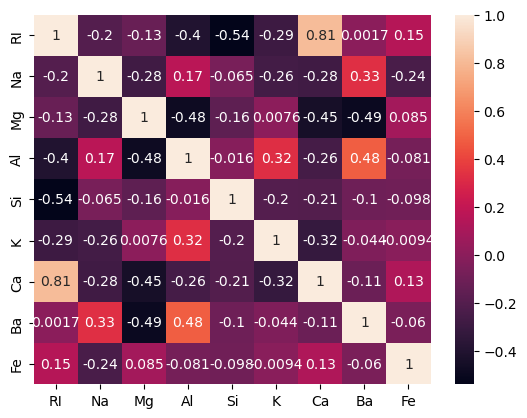

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [19]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

<Axes: xlabel='Type', ylabel='count'>

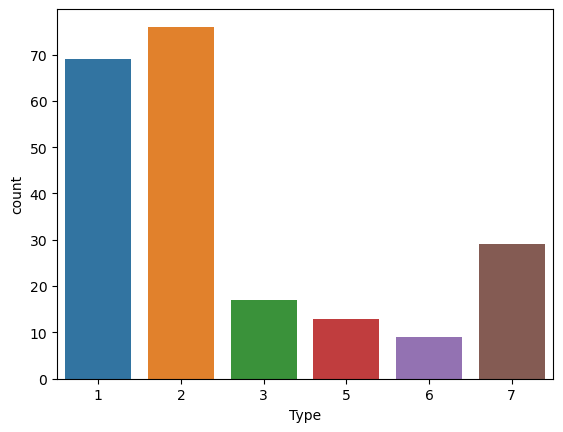

In [20]:
sns.countplot(x ='Type', data = df)

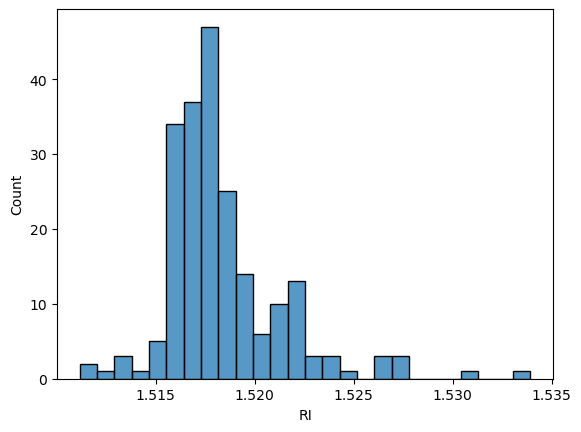

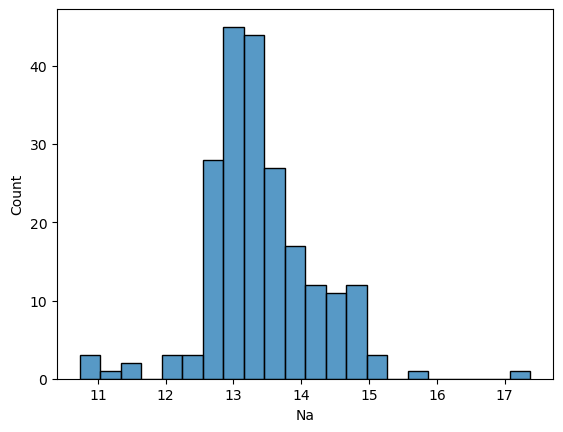

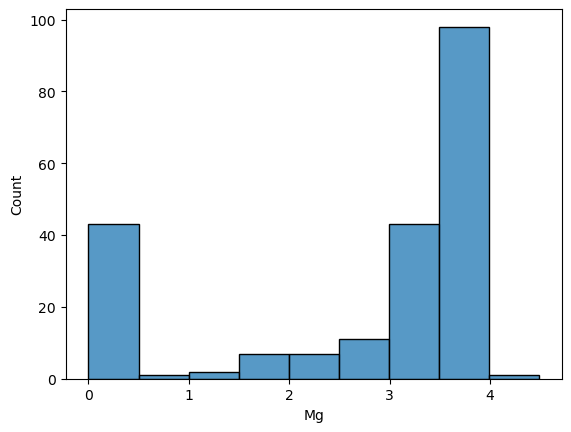

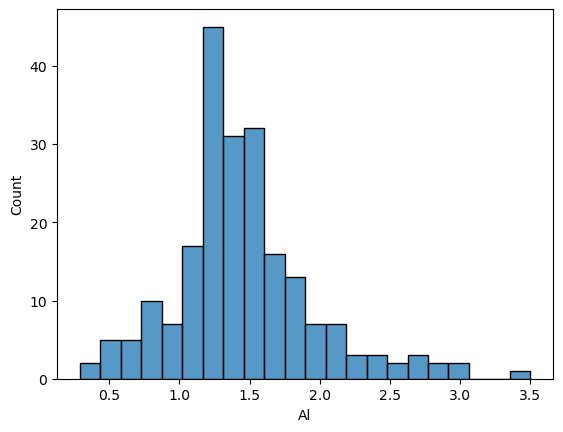

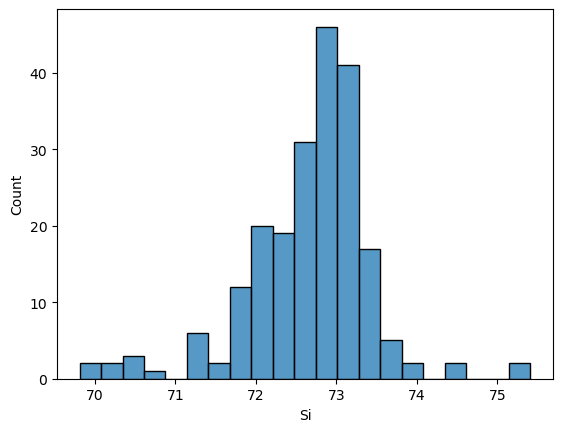

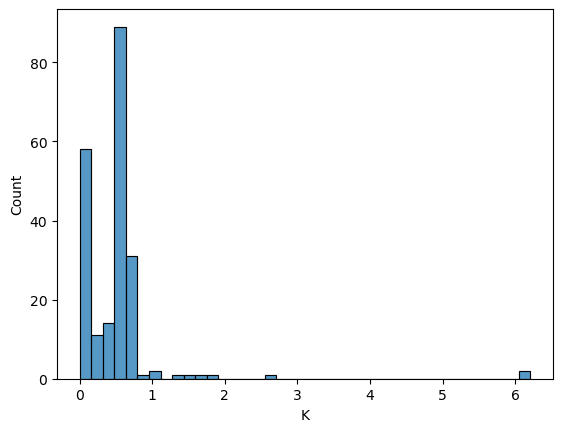

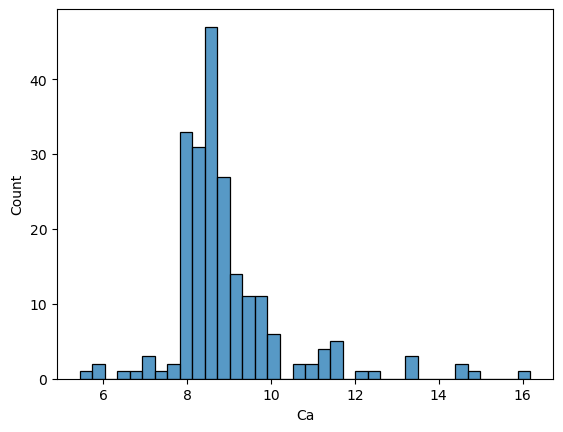

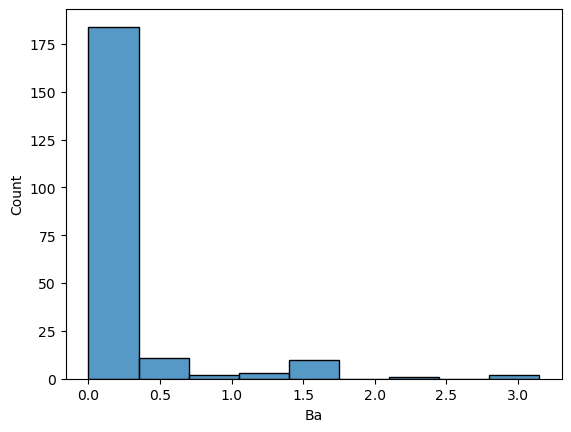

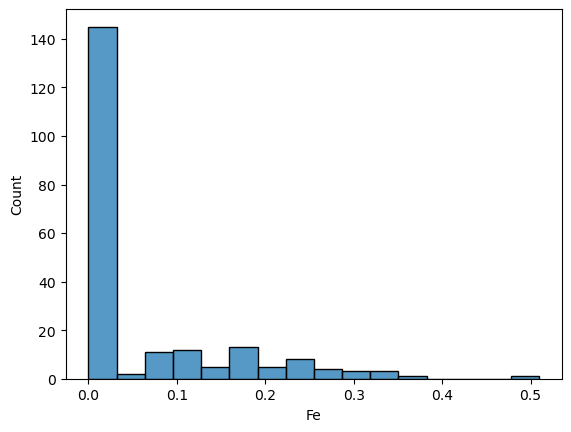

In [21]:
#Multiple Hist plot
for feature in features:
    sns.histplot(df[feature])
    plt.show()

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


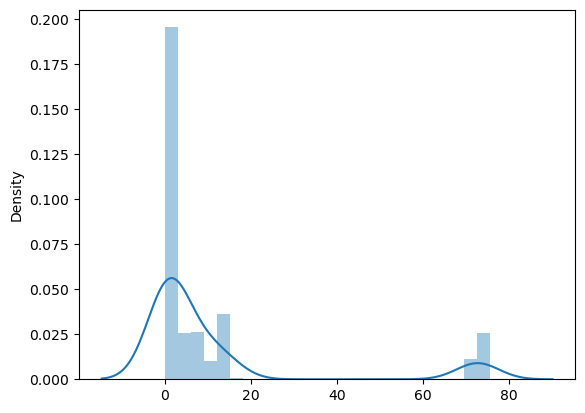

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


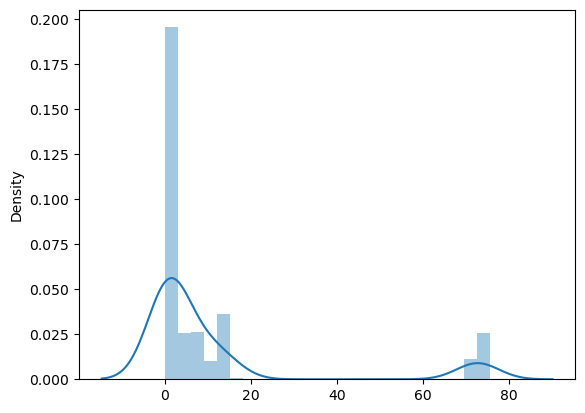

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


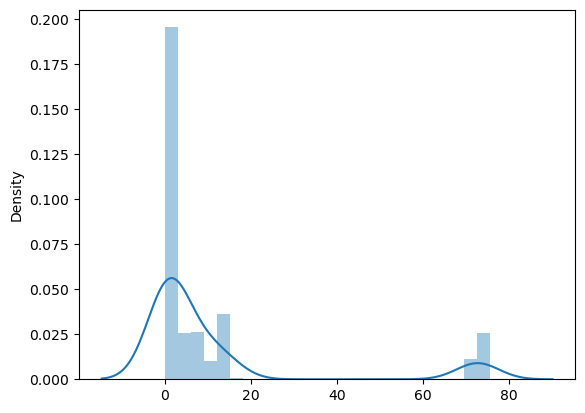

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


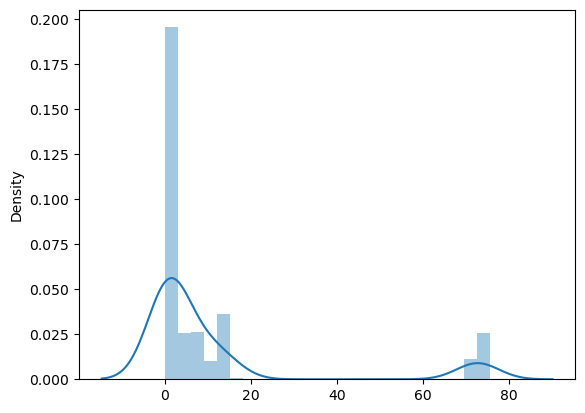

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


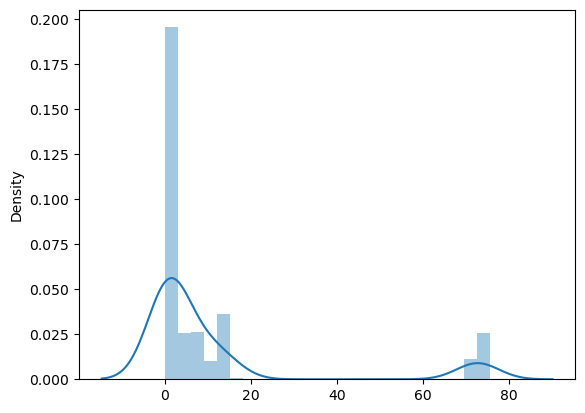

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


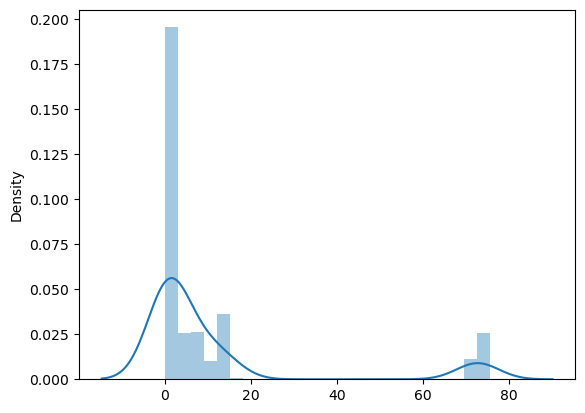

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


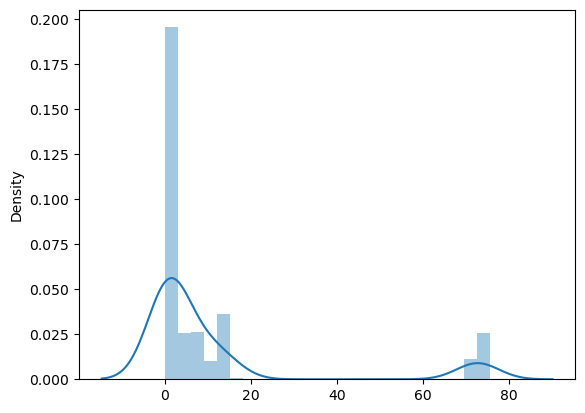

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


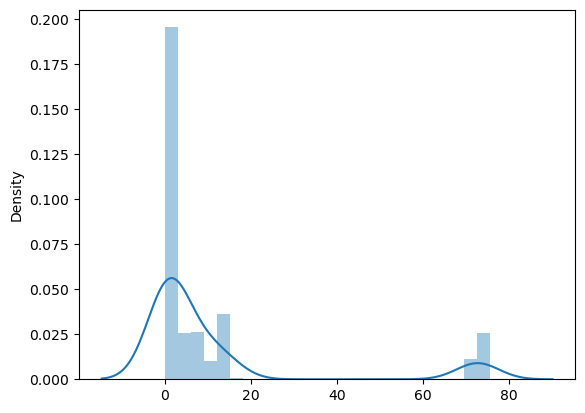

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_11384\1664313625.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features],bins=25)


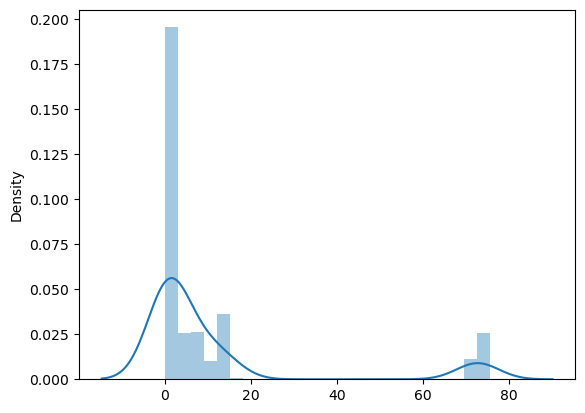

In [22]:
#multiple Dist Plot
for feature in features:
    sns.distplot(df[features],bins=25)
    plt.show()

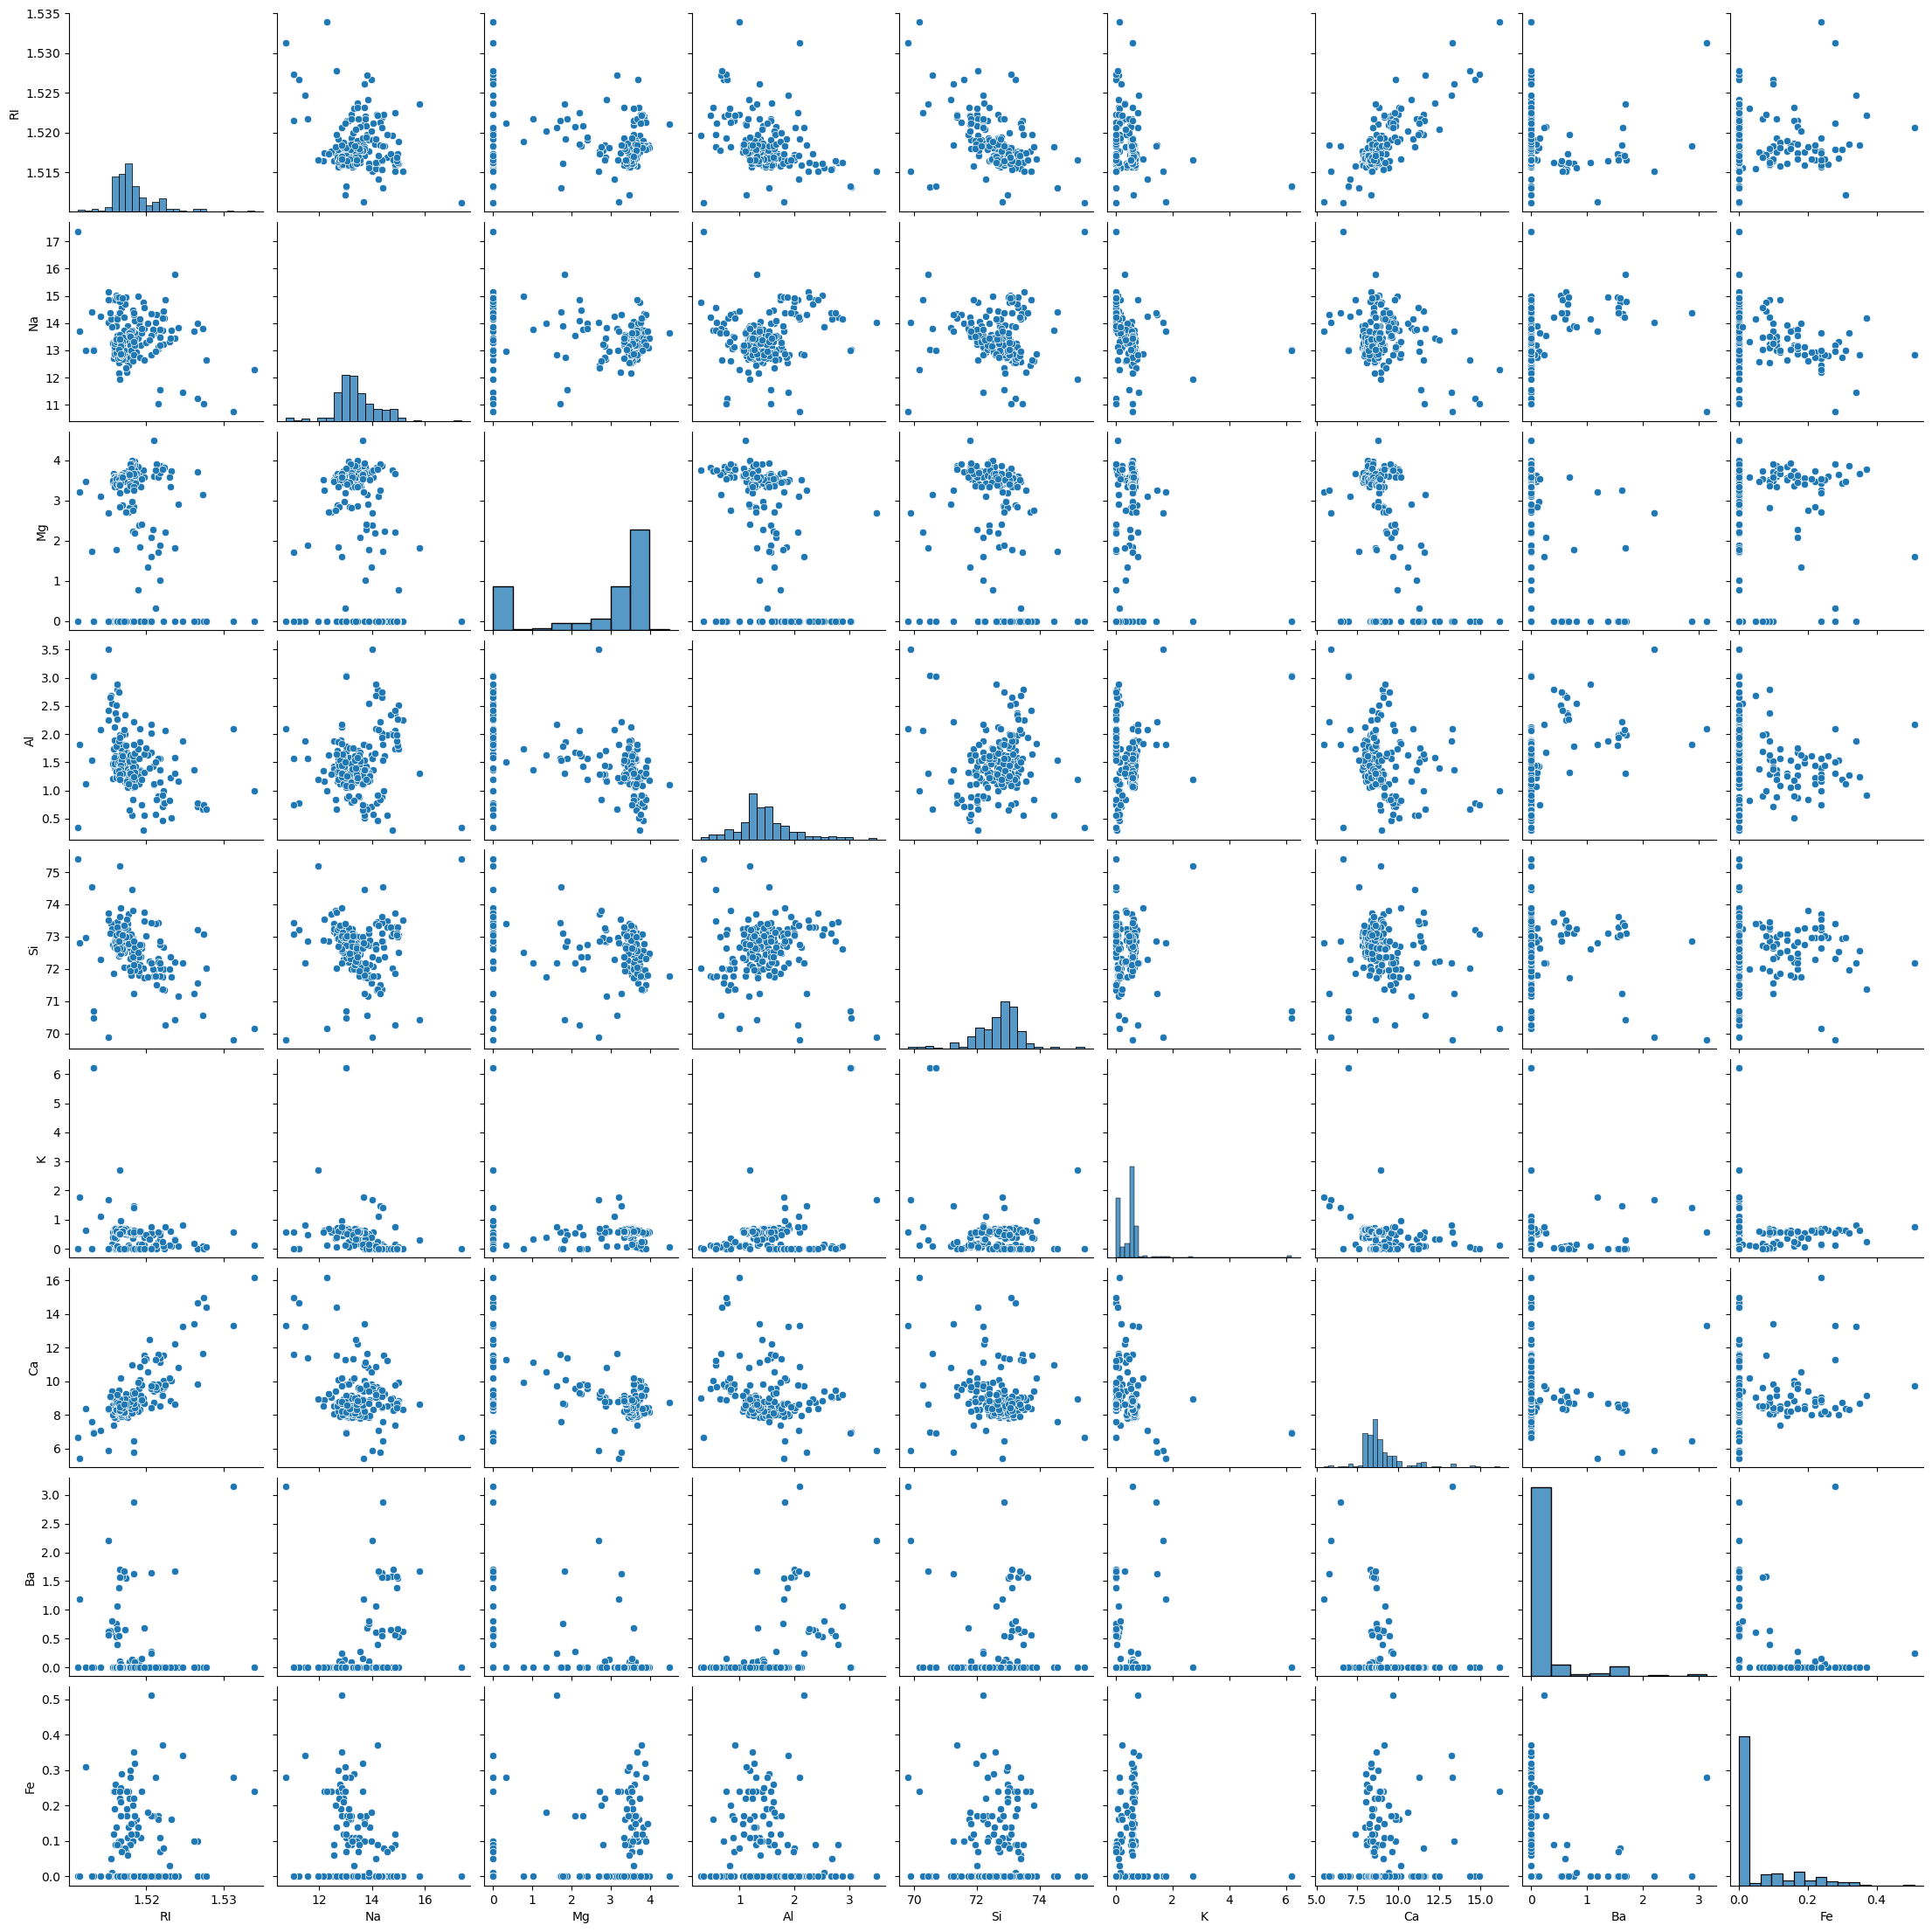

In [23]:
#pair plot
sns.pairplot(df[features])

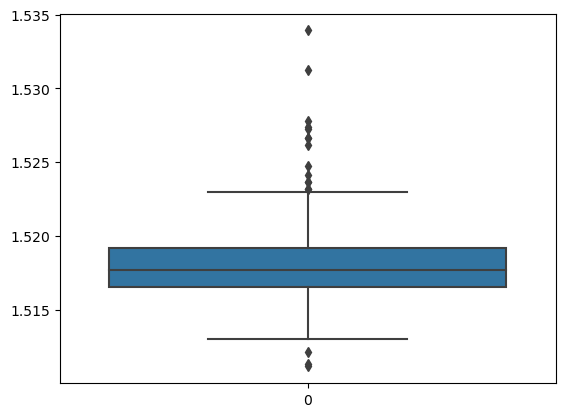

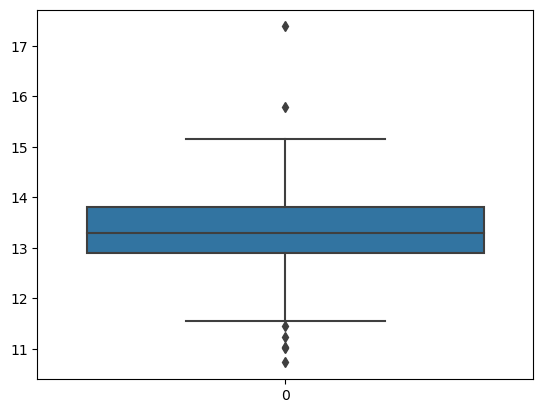

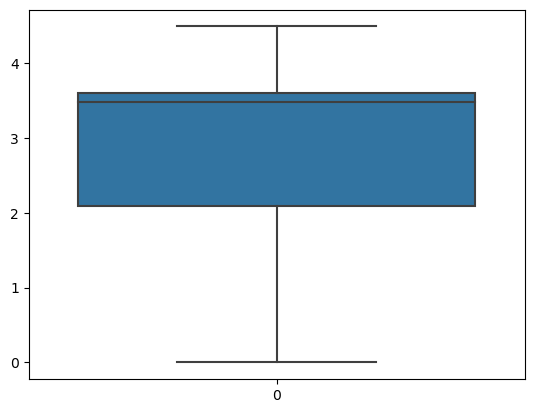

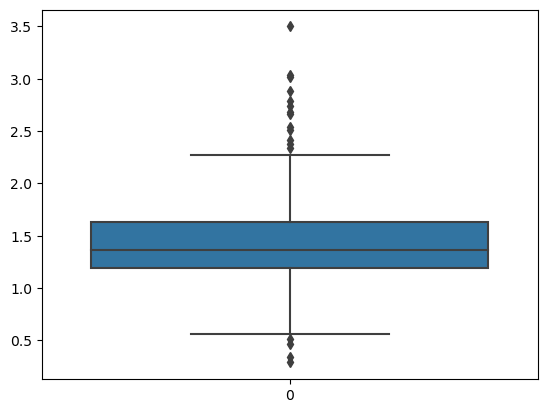

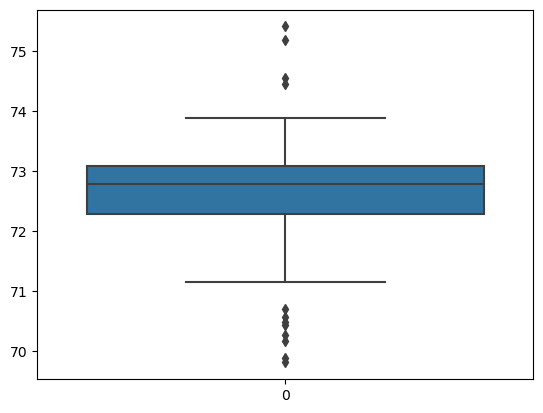

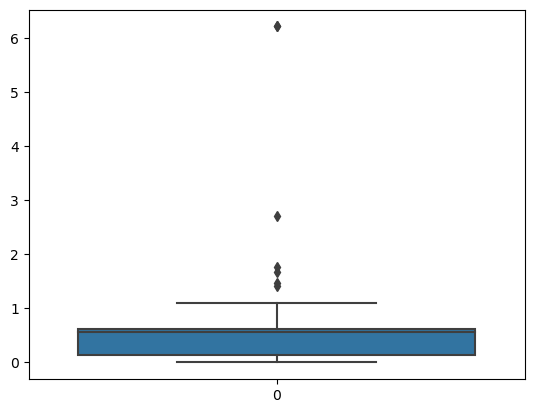

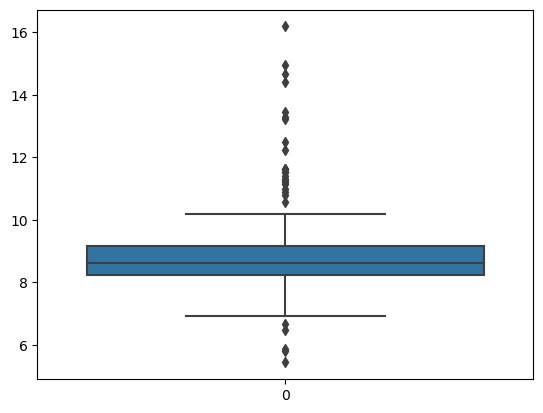

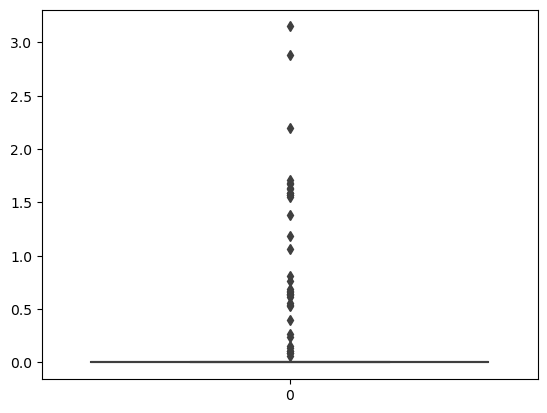

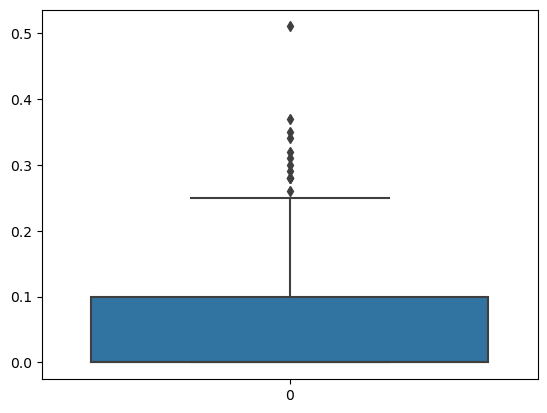

In [24]:
#Multiple Box Plot
for feature in features:
    sns.boxplot(df[feature])
    plt.show()

In [25]:
#data preprocessing with min-max scaler

In [26]:
# lets split the into the input and target variable
x= df.iloc[:, 0:-1]
y= df.iloc[:, -1]

In [27]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: category
Categories (6, int64): [1, 2, 3, 5, 6, 7]

In [29]:
# Spliting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 1)

In [30]:
#transformation

trf = MinMaxScaler()

In [31]:
preproc = ColumnTransformer(transformers=[('scaling', trf, features)])

In [32]:
pipe = Pipeline(steps=[('Preprocessor',preproc)])

In [33]:
X_train = pipe.fit_transform(x_train)

In [34]:
X_train

array([[0.1       , 0.3443609 , 0.        , ..., 0.16054565, 0.        ,
        0.        ],
       [0.24378109, 0.32631579, 0.86432161, ..., 0.2980063 , 0.        ,
        0.        ],
       [0.35621891, 0.55037594, 0.        , ..., 0.10912907, 0.91428571,
        0.        ],
       ...,
       [0.25671642, 0.3924812 , 0.89698492, ..., 0.25813221, 0.        ,
        0.        ],
       [0.36616915, 0.37142857, 0.9120603 , ..., 0.31269675, 0.02857143,
        0.33333333],
       [0.33930348, 0.30225564, 0.87437186, ..., 0.34102833, 0.        ,
        0.        ]])

In [35]:
X_test = pipe.transform(x_test)

In [36]:
X_test

array([[0.34975124, 0.44962406, 0.        , 0.08411215, 0.82857143,
        0.        , 0.58342078, 0.        , 0.        ],
       [0.25273632, 0.52180451, 0.        , 0.7788162 , 0.65178571,
        0.00644122, 0.37880378, 0.12698413, 0.17647059],
       [1.13333333, 0.23609023, 0.        , 0.2211838 , 0.0625    ,
        0.01932367, 1.12906611, 0.        , 0.47058824],
       [0.55074627, 0.55639098, 0.        , 0.2211838 , 0.51071429,
        0.01610306, 0.63903463, 0.        , 0.15686275],
       [0.34477612, 0.40601504, 0.72110553, 0.28037383, 0.54107143,
        0.08856683, 0.37775446, 0.        , 0.        ],
       [0.31741294, 0.27669173, 0.8718593 , 0.33956386, 0.63928571,
        0.09661836, 0.3273872 , 0.        , 0.11764706],
       [0.39303483, 0.43157895, 0.90954774, 0.25545171, 0.50535714,
        0.02254428, 0.34942288, 0.        , 0.        ],
       [0.24626866, 0.40451128, 0.85427136, 0.28971963, 0.51428571,
        0.09500805, 0.30325289, 0.        , 0.        ],


In [37]:
#Perform KNN search

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = knn.predict(X_test)

In [41]:
accu = accuracy_score(y_test,y_pred)
accu

0.7037037037037037

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.72      0.82      0.77        22
           2       0.63      0.71      0.67        17
           3       0.00      0.00      0.00         7
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5

    accuracy                           0.70        54
   macro avg       0.61      0.75      0.66        54
weighted avg       0.63      0.70      0.66        54



C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#Grid Search CV
#Hyperparameter tuning

In [44]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [45]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [46]:
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10)

In [47]:
#Fit the model
Best_Model = clf.fit(X_train,y_train)

C:\Users\Yogendra\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [48]:
#Print The value of best Hyperparameters
print('Best leaf_size:', Best_Model.best_estimator_.get_params()['leaf_size'])
print('Best p:', Best_Model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', Best_Model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 4


In [49]:
# modelling using the optimized hyperparapmeters

In [50]:
knnOpt = KNeighborsClassifier(leaf_size= 1, n_neighbors= 4, p= 1)
knnOpt.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=4, p=1)

In [51]:
y_predNew = knnOpt.predict(X_test)
print(classification_report(y_test, y_predNew))

              precision    recall  f1-score   support

           1       0.73      0.86      0.79        22
           2       0.75      0.71      0.73        17
           3       0.50      0.14      0.22         7
           5       0.50      1.00      0.67         1
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         5

    accuracy                           0.74        54
   macro avg       0.69      0.79      0.70        54
weighted avg       0.73      0.74      0.71        54



In [52]:
#as evident the Cross validated grid search with hyperparameter tuning increases the model accuracy